In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm

In [77]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [78]:
display(df)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [79]:
# Drop the rows where 'Functioning Day' is 'No'
df = df[df['Functioning Day'] != 'No']

In [80]:
# Use pd.get_dummies() to one-hot encode the 'Snowfall_Category' column
df = pd.get_dummies(df, columns=['Seasons'])

In [81]:
# Define the categorization function with one-hot encoding
def categorize_hour(hour):
    if hour >= 0 and hour <= 6 or hour == 24:
        return 'night'
    elif hour >= 7 and hour <= 8:
        return 'morning'
    elif hour >= 9 and hour <= 13:
        return 'early_afternoon'
    elif hour >= 14 and hour <= 17:
        return 'late_afternoon'
    elif hour ==18:
        return 'rush_hour'
    elif hour >= 19 and hour <= 23:
        return 'evening'
    else:
        return 'Unknown'  # This case should not occur given the data

# Apply the function to categorize hours
df['Hour_Category'] = df['Hour'].apply(categorize_hour)

# Now use pd.get_dummies() to one-hot encode the 'Hour_Category' column
df = pd.get_dummies(df, columns=['Hour_Category'])

In [82]:
# Function to categorize snowfall
def categorize_snowfall(snowfall):
    if snowfall == 0:
        return 'no_snowfall'
    elif 0 < snowfall <= 1:
        return 'light_snowfall'
    elif 1 < snowfall <= 2.5:
        return 'moderate_snowfall'
    elif 2.5 < snowfall:
        return 'heavy_snowfall'

# Apply the function to the 'Snowfall (cm)' column to create a new 'Snowfall_Category' column
df['Snowfall_Category'] = df['Snowfall (cm)'].apply(categorize_snowfall)

# Use pd.get_dummies() to one-hot encode the 'Snowfall_Category' column
df = pd.get_dummies(df, columns=['Snowfall_Category'])

In [83]:
# Function to categorize rainfall
def categorize_rainfall(rainfall):
    if rainfall == 0:
        return 'no_rainfall'
    elif 0 < rainfall <= 2.5:
        return 'light_rainfall'
    elif 2.5 < rainfall <= 7.6:
        return 'moderate_rainfall'
    elif rainfall > 7.6:
        return 'heavy_rainfall'

# Apply the function to the 'Rainfall(mm)' column to create a new 'Rainfall_Category' column
df['Rainfall_Category'] = df['Rainfall(mm)'].apply(categorize_rainfall)

# Use pd.get_dummies() to one-hot encode the 'Rainfall_Category' column
df = pd.get_dummies(df, columns=['Rainfall_Category'])


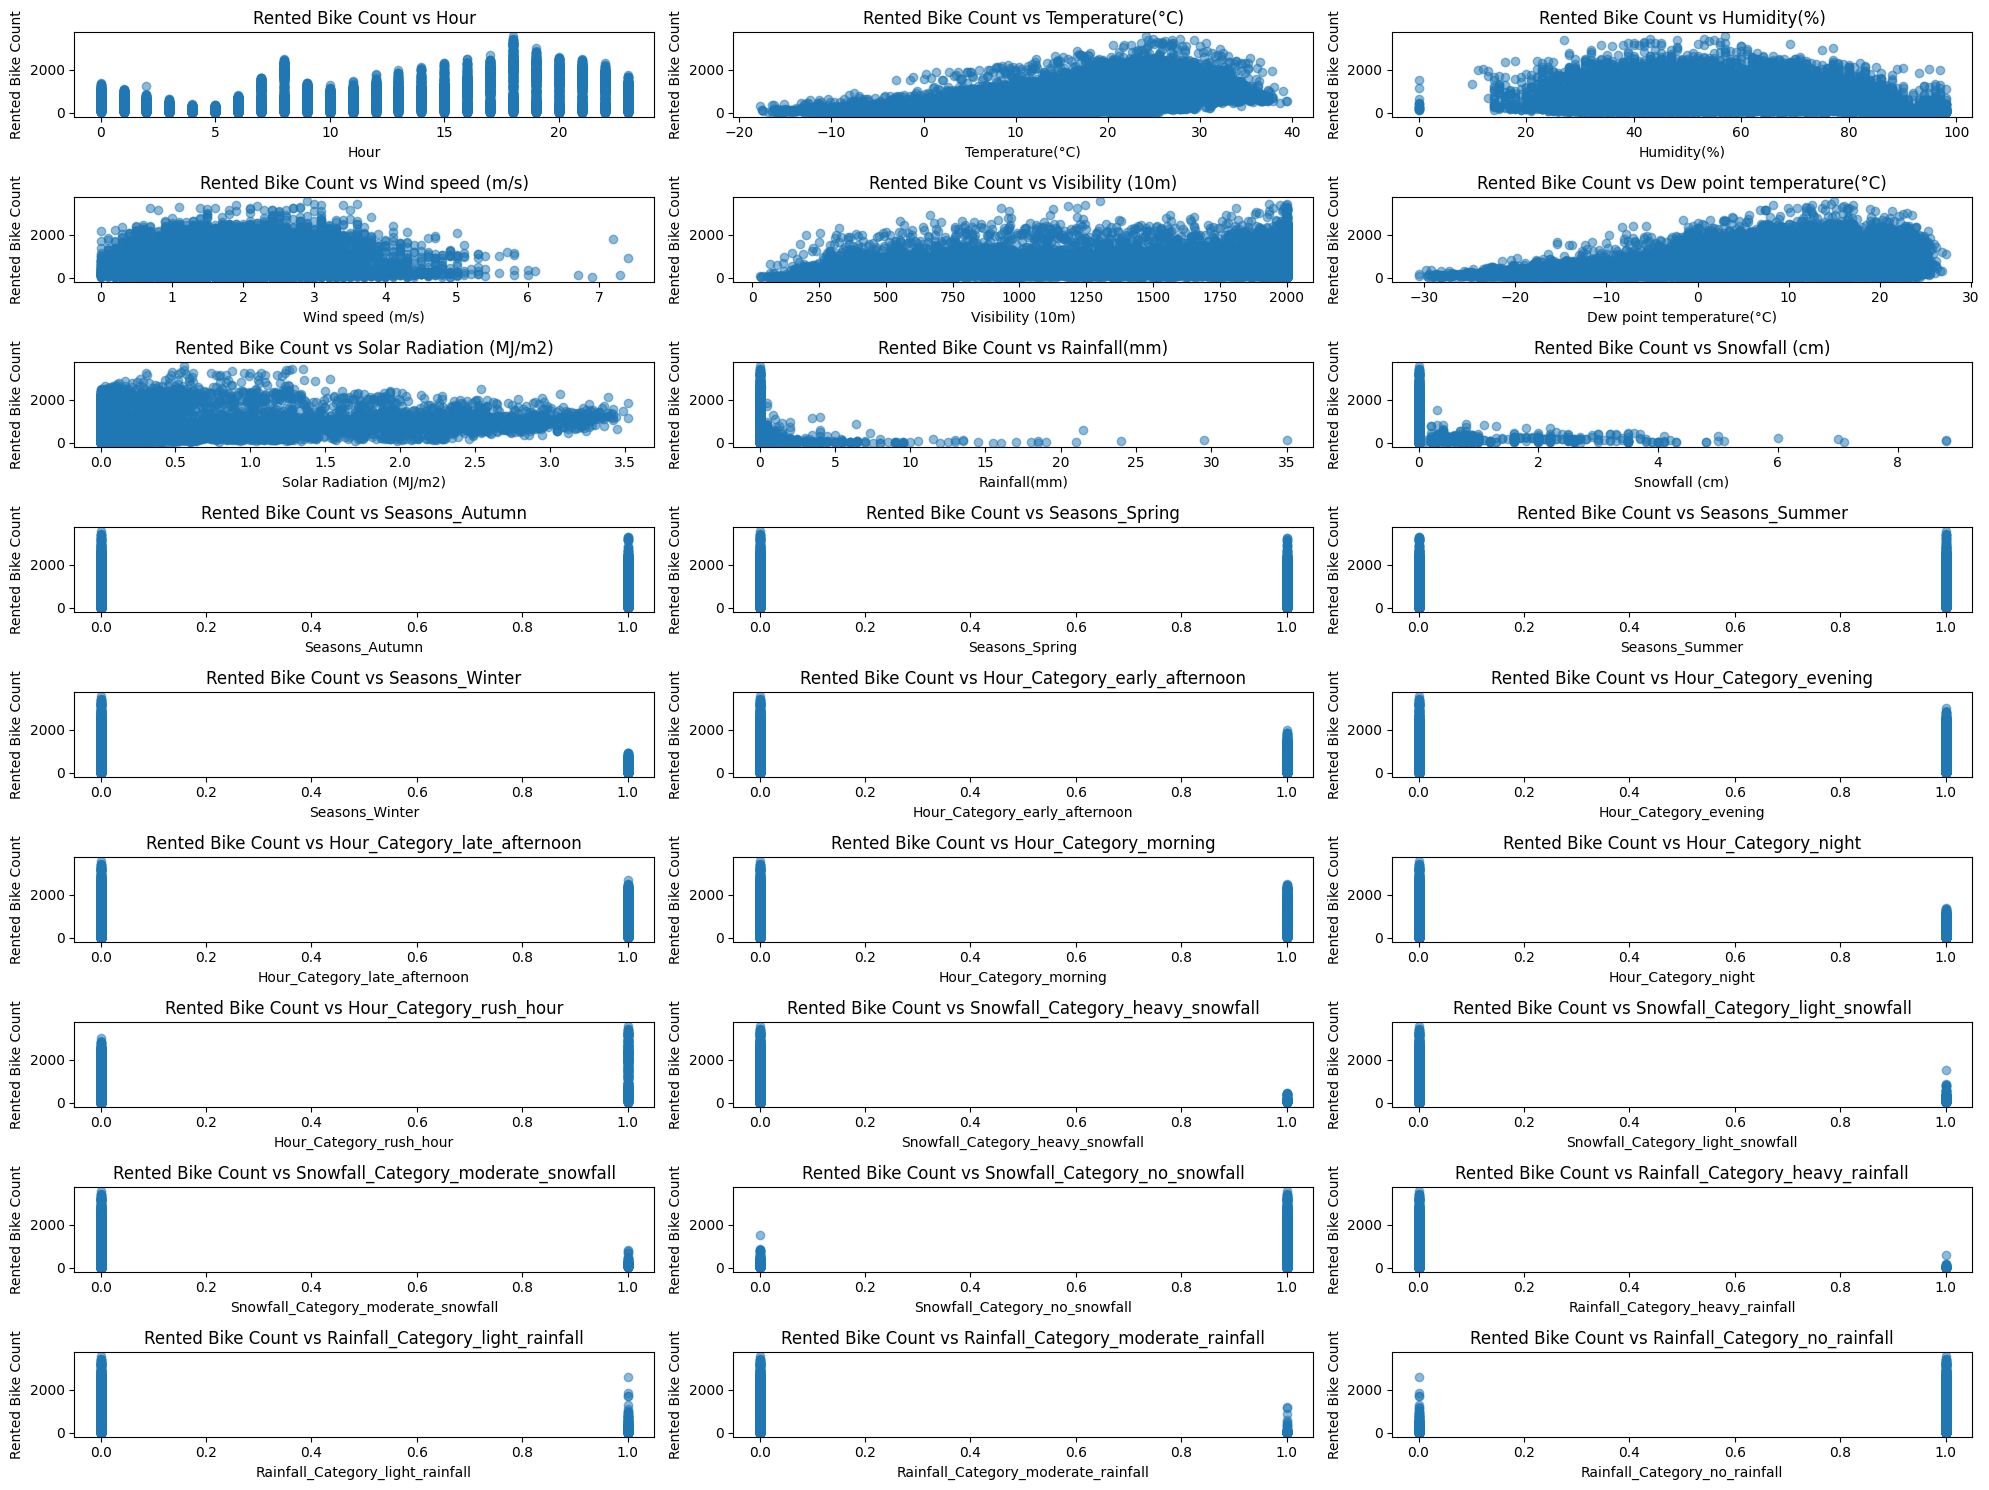

In [84]:
response_var = 'Rented Bike Count'
predictors = df.columns.drop([response_var, 'Date', 'Holiday', 'Functioning Day'])  # Drop non-numerical and non-predictor columns

plt.figure(figsize=(20, 15))
num_plots = len(predictors)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)

# Create scatter plots for each predictor
for i, predictor in enumerate(predictors):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(df[predictor], df[response_var], alpha=0.5)
    plt.title(f'{response_var} vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel(response_var)

plt.tight_layout()
plt.show()

In [85]:
summary_statistics = df.describe()
summary_statistics

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000


In [86]:
X1 = df[['Temperature(°C)']]
X1 = sm.add_constant(X1)
y1 = df['Rented Bike Count']

model1 = sm.OLS(y1, X1).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     3922.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:25:34   Log-Likelihood:                -65127.
No. Observations:                8465   AIC:                         1.303e+05
Df Residuals:                    8463   BIC:                         1.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             347.7708      8.390     

In [87]:
X2 = df[['Hour_Category_morning','Hour_Category_early_afternoon','Hour_Category_late_afternoon',
         'Hour_Category_rush_hour','Hour_Category_evening', 'Temperature(°C)', 'Humidity(%)','Visibility (10m)',
         'Rainfall_Category_light_rainfall', 'Rainfall_Category_moderate_rainfall', 'Rainfall_Category_heavy_rainfall',
         'Snowfall_Category_light_snowfall', 'Snowfall_Category_moderate_snowfall', 'Snowfall_Category_heavy_snowfall',
         'Seasons_Autumn', 'Seasons_Spring','Seasons_Winter']]
X2 = sm.add_constant(X2)
X2 = X2.astype(int)
y2 = df['Rented Bike Count']

model2 = sm.OLS(y2, X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     861.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:25:34   Log-Likelihood:                -62481.
No. Observations:                8465   AIC:                         1.250e+05
Df Residuals:                    8447   BIC:                         1.251e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

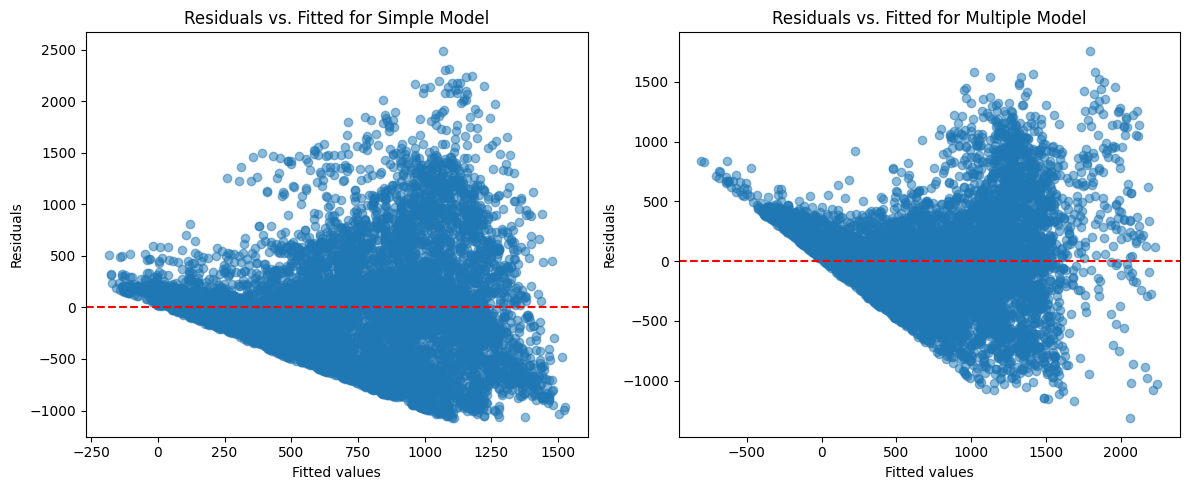

In [88]:
predictions1 = model1.predict(X1)
residuals1 = y1 - predictions1

predictions2 = model2.predict(X2)
residuals2 = y2 - predictions2

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(predictions1, residuals1, alpha=0.5)
plt.title('Residuals vs. Fitted for Simple Model')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(predictions2, residuals2, alpha=0.5)
plt.title('Residuals vs. Fitted for Multiple Model')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [89]:
mean_temperature = df['Temperature(°C)'].mean()

X_new = pd.DataFrame({'const': 1, 'Temperature(°C)': [mean_temperature]})

prediction = model1.get_prediction(X_new)
prediction_summary = prediction.summary_frame(alpha=0.05)

print(prediction_summary)

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  729.156999  5.771622      717.84321     740.470788   -311.834565   

   obs_ci_upper  
0   1770.148563  


In [90]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Hour_Category_night,Hour_Category_rush_hour,Snowfall_Category_heavy_snowfall,Snowfall_Category_light_snowfall,Snowfall_Category_moderate_snowfall,Snowfall_Category_no_snowfall,Rainfall_Category_heavy_rainfall,Rainfall_Category_light_rainfall,Rainfall_Category_moderate_rainfall,Rainfall_Category_no_rainfall
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True


In [91]:
df = df.drop(['Hour', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Rainfall(mm)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Functioning Day', 'Holiday','Date'], axis=1)

In [92]:
# Code to calculate VIF for the specified variables only
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# The specified independent variables
X2 = df[['Hour_Category_morning','Hour_Category_early_afternoon','Hour_Category_late_afternoon',
         'Hour_Category_rush_hour','Hour_Category_evening', 'Temperature(°C)', 'Humidity(%)','Visibility (10m)',
         'Rainfall_Category_light_rainfall', 'Rainfall_Category_moderate_rainfall', 'Rainfall_Category_heavy_rainfall',
         'Snowfall_Category_light_snowfall', 'Snowfall_Category_moderate_snowfall', 'Snowfall_Category_heavy_snowfall',
         'Seasons_Autumn', 'Seasons_Spring','Seasons_Winter']]

# Add a constant term for intercept
X2 = add_constant(X2)
X2 = X2.astype(int)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

vif_data

,feature,VIF
0,const,83.985097
1,Hour_Category_morning,1.182578
2,Hour_Category_early_afternoon,1.663250
3,Hour_Category_late_afternoon,1.834588
4,Hour_Category_rush_hour,1.181686
5,Hour_Category_evening,1.436302
6,Temperature(°C),4.827246
7,Humidity(%),2.453535
8,Visibility (10m),1.692026
9,Rainfall_Category_light_rainfall,1.165880


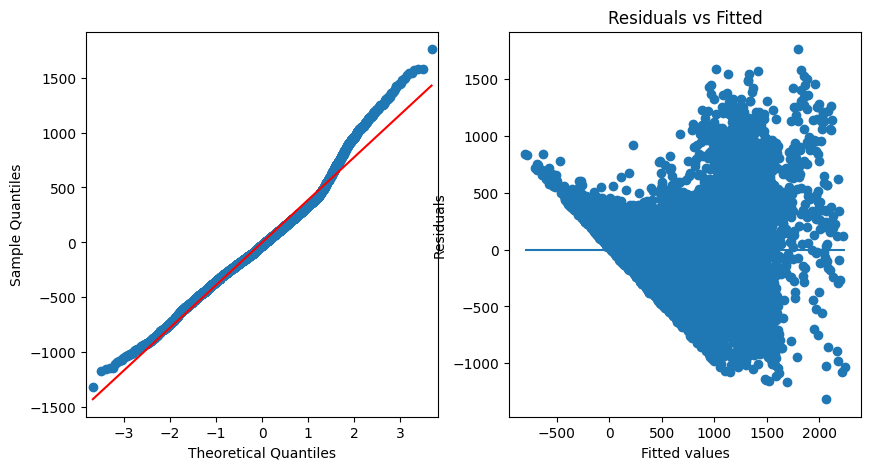

In [93]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the model
model = sm.OLS(y2, X2).fit()

# Plot the residuals
residuals = model.resid
fig, ax = plt.subplots(1,2, figsize=(10,5))
sm.qqplot(residuals, line='s', ax=ax[0])  # QQ plot for normality
ax[1].scatter(model.predict(), residuals)  # Residual plot for homoscedasticity
ax[1].hlines(y=0, xmin=min(model.predict()), xmax=max(model.predict()))
ax[1].set_title('Residuals vs Fitted')
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')
plt.show()

In [94]:
from scipy import stats

# The Box-Cox transformation requires positive values
df['Rented Bike Count'] += 1  # Ensure there are no zero values
df['bc_Rented_Bike_Count'], lam = stats.boxcox(df['Rented Bike Count'])


In [95]:
X2 = df[['Hour_Category_morning','Hour_Category_early_afternoon','Hour_Category_late_afternoon',
         'Hour_Category_rush_hour','Hour_Category_evening', 'Temperature(°C)', 'Humidity(%)','Visibility (10m)',
         'Rainfall_Category_light_rainfall', 'Rainfall_Category_moderate_rainfall', 'Rainfall_Category_heavy_rainfall',
         'Snowfall_Category_light_snowfall', 'Snowfall_Category_moderate_snowfall', 'Snowfall_Category_heavy_snowfall',
         'Seasons_Autumn', 'Seasons_Spring','Seasons_Winter']]
X2 = sm.add_constant(X2)
X2 = X2.astype(int)
y2 = df['bc_Rented_Bike_Count']

model2 = sm.OLS(y2, X2).fit()

print(model2.summary())

                             OLS Regression Results                             
Dep. Variable:     bc_Rented_Bike_Count   R-squared:                       0.729
Model:                              OLS   Adj. R-squared:                  0.728
Method:                   Least Squares   F-statistic:                     1335.
Date:                  Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                          21:25:35   Log-Likelihood:                -21294.
No. Observations:                  8465   AIC:                         4.262e+04
Df Residuals:                      8447   BIC:                         4.275e+04
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

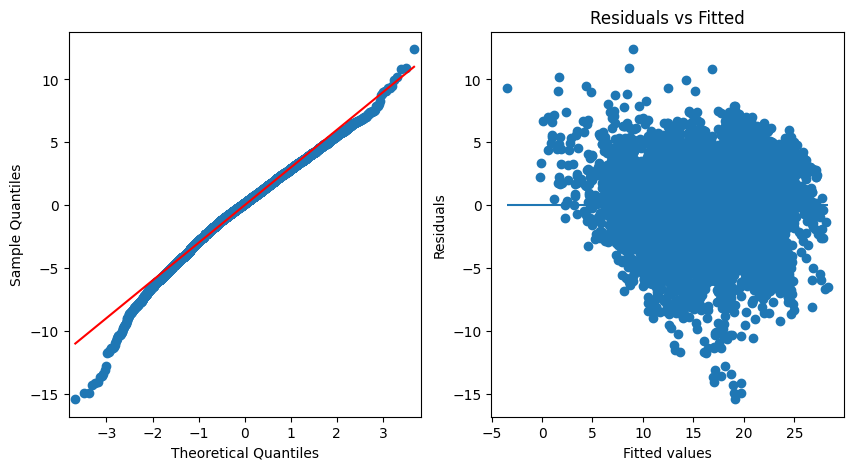

In [96]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the model
model = sm.OLS(y2, X2).fit()

# Plot the residuals
residuals = model.resid
fig, ax = plt.subplots(1,2, figsize=(10,5))
sm.qqplot(residuals, line='s', ax=ax[0])  # QQ plot for normality
ax[1].scatter(model.predict(), residuals)  # Residual plot for homoscedasticity
ax[1].hlines(y=0, xmin=min(model.predict()), xmax=max(model.predict()))
ax[1].set_title('Residuals vs Fitted')
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')
plt.show()